<a href="https://colab.research.google.com/github/MariaMoraru/Dissertation/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airlines.csv to Airlines.csv


In [ ]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
mydata = pd.read_csv('Airlines.csv')
#mydata = mydata[:20]
mydata.shape

(539383, 9)

In [ ]:
# split data into X and y
#create a dataframe with all training data except the target column
X = mydata.drop(columns=['id','Airline','AirportFrom','AirportTo','Delay'])

#check that the target variable has been removed
X.head()

,Flight,DayOfWeek,Time,Length
0,269,3,15,205
1,1558,3,15,222
2,2400,3,20,165
3,2466,3,20,195
4,108,3,30,202


In [ ]:
#separate target values
y = mydata['Delay'].values

#view target values
y[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier()
y_pred_test=clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test)   #prints the accuracy score

0.5634101801125355

In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 0.614 (0.002)


In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[45913, 13911],
       [28802, 19251]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test)   #prints the accuracy score

0.6040583256857347

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     59824
           1       0.58      0.40      0.47     48053

    accuracy                           0.60    107877
   macro avg       0.60      0.58      0.58    107877
weighted avg       0.60      0.60      0.59    107877



In [ ]:
from sklearn import svm
from sklearn.metrics import hinge_loss
est = svm.LinearSVC()
est.fit(X_test, y_test)
pred_decision = est.decision_function(X_test)
hinge_loss(y_test, pred_decision)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.21527977111247568

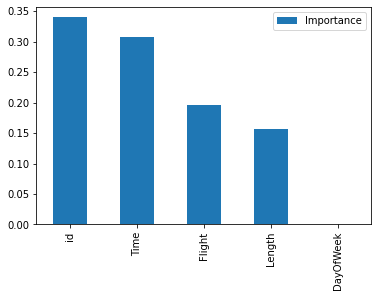

In [ ]:
model = model.fit(X,y)
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

In [ ]:
# remove the id column
mydata.drop(['id'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
# replace M with 1 and B with 0
# my_map = {
          'M':1,
          'B' :0
         }
 
# df['diagnosis'] = df['diagnosis'].map(my_map)

IndentationError: ignored

In [ ]:
print('The shape of our features is:', mydata.shape)

The shape of our features is: (20, 9)


In [ ]:
# Descriptive statistics for each column
mydata.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,20.00000,20.000000,20.0,20.000000,20.000000,20.000000
mean,10.50000,1402.100000,3.0,41.650000,197.200000,0.450000
std,5.91608,963.890467,0.0,17.415284,20.877084,0.510418
min,1.00000,98.000000,3.0,15.000000,162.000000,0.000000
25%,5.75000,440.750000,3.0,30.000000,180.500000,0.000000
50%,10.50000,1527.000000,3.0,44.500000,201.500000,0.000000
75%,15.25000,2402.000000,3.0,55.000000,213.500000,1.000000
max,20.00000,2722.000000,3.0,75.000000,228.000000,1.000000


array([1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# One-hot encode the data using pandas get_dummies
#mydata = pd.get_dummies(mydata)
# Display the first 5 rows of the last 12 columns
#mydata.iloc[:,5:].head(5)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [ ]:
errors

array([0.425, 0.016, 0.154, 0.053])

In [ ]:
y_test

array([1, 0, 1, 0])

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

NameError: ignored

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', X_names = X_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

NameError: ignored

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(train, train_labels)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [ ]:
#predicting output for test data
pred = model.predict(X)

NotFittedError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
#building confusion matrix
cm = confusion_matrix(y, pred)
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [10,4]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':20})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

NameError: ignored